In [1]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
X = X[:,:41] #only taking first 41, maybe deal with the other values later(categorical, binary)

[Xtr, Xva, Ytr, Yva] = ml.splitData(X,Y,0.70) #70% training, 30% validation


for feature_index in range(20):
    print(f"Mean for feature {feature_index + 1} = {X[:,feature_index].mean()}")
    print(f"Minimum for feature {feature_index + 1} = {X[:,feature_index].min()}")
    print(f"Maximum for feature {feature_index + 1} = {X[:,feature_index].max()}")
    print(f"Variance for feature {feature_index + 1} = {X[:,feature_index].var()}")

Mean for feature 1 = 1321.1174134446992
Minimum for feature 1 = 0.0
Maximum for feature 1 = 110285.0
Variance for feature 1 = 6747189.595085322
Mean for feature 2 = 6.5916745251246125
Minimum for feature 2 = 0.0
Maximum for feature 2 = 35.0
Variance for feature 2 = 34.70690630279573
Mean for feature 3 = 1152.273237235619
Minimum for feature 3 = 0.0
Maximum for feature 3 = 51536.0
Variance for feature 3 = 5376518.288798101
Mean for feature 4 = 234.8262548834703
Minimum for feature 4 = 0.0
Maximum for feature 4 = 21768.0
Variance for feature 4 = 260120.83053297663
Mean for feature 5 = 289.75871211100633
Minimum for feature 5 = 0.0
Maximum for feature 5 = 27210.0
Variance for feature 5 = 406615.8651128233
Mean for feature 6 = 4.442678162468005
Minimum for feature 6 = 0.0
Maximum for feature 6 = 250.0
Variance for feature 6 = 73.16574963736093
Mean for feature 7 = 98.75410211504781
Minimum for feature 7 = 0.0
Maximum for feature 7 = 7040.0
Variance for feature 7 = 45353.787424571005
Mean f

## Max Depth Learners

In [2]:
depths = 16

training_error_rates = np.zeros(depths)
validation_error_rates = np.zeros(depths)

training_auc = np.zeros(depths)
validation_auc = np.zeros(depths)

for max_depth in range(depths):
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent = 5, minLeaf=5, maxDepth=max_depth)
    #Ytr_hat = learner.predict(Xtr)
    #Yva_hat = learner.predict(Xva)

    err_train = learner.err(Xtr,Ytr) 
    err_validate = learner.err(Xva, Yva) 
    
    auc_train = learner.auc(Xtr,Ytr) 
    auc_validate = learner.auc(Xva, Yva) 
    
    # save error rates
    training_error_rates[max_depth] = err_train
    validation_error_rates[max_depth] = err_validate
    
    training_auc[max_depth] = auc_train
    validation_auc[max_depth] = auc_validate

    # print(f"Training error = {err_train}")
    # print(f"Validation error = {err_validate}")


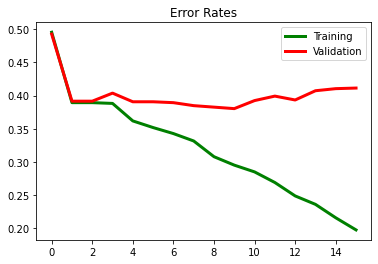

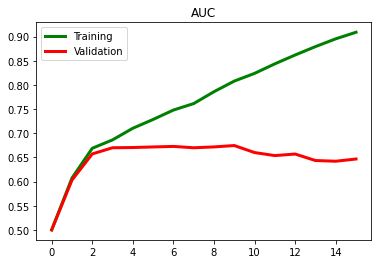

In [3]:
fig, ax = plt.subplots(1,1)


depths_arr = np.arange(0, depths)
ax.plot(depths_arr, training_error_rates, "g-", lw=3, label = "Training")
ax.plot(depths_arr, validation_error_rates, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("Error Rates")
plt.show()

fig, ax = plt.subplots(1,1)
ax.plot(depths_arr, training_auc, "g-", lw=3, label = "Training")
ax.plot(depths_arr, validation_auc, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("AUC")
plt.show()

Looks like `maxDepth` = 8 is good

## Min Parent Learners

In [4]:

min_parents = np.logspace(0,13,num=13,base=2,dtype='int')
min_parents_training_error_rates = np.zeros(len(min_parents))
min_parents_validation_error_rates = np.zeros(len(min_parents))

min_parents_training_auc= np.zeros(len(min_parents))
min_parents_validation_auc = np.zeros(len(min_parents))


for index,min_parent in enumerate(min_parents):
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=min_parent, minLeaf=5, maxDepth=100)
    #Ytr_hat = learner.predict(Xtr)
    #Yva_hat = learner.predict(Xva)
    

    err_train = learner.err(Xtr,Ytr) 
    err_validate = learner.err(Xva, Yva) 
    
    auc_train = learner.auc(Xtr,Ytr) 
    auc_validate = learner.auc(Xva, Yva) 
    
    # save error rates
    min_parents_training_error_rates[index] = err_train
    min_parents_validation_error_rates[index] = err_validate
    
    min_parents_training_auc[index] = auc_train
    min_parents_validation_auc[index] = auc_validate



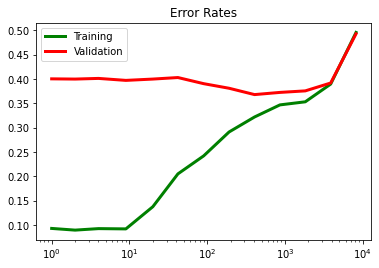

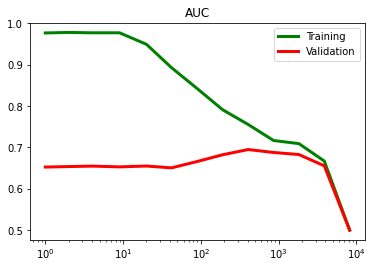

In [5]:
fig, ax = plt.subplots(1,1)


ax.semilogx(min_parents, min_parents_training_error_rates, "g-", lw=3, label = "Training")
ax.semilogx(min_parents, min_parents_validation_error_rates, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("Error Rates")
plt.show()

fig, ax = plt.subplots(1,1)


ax.semilogx(min_parents, min_parents_training_auc, "g-", lw=3, label = "Training")
ax.semilogx(min_parents, min_parents_validation_auc, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("AUC")
plt.show()

`minParent` = around 400

## Min Leaves Learners

In [6]:
min_leaves = np.logspace(0,13,num=13,base=2,dtype='int')
min_leaves_training_error_rates = np.zeros(len(min_leaves))
min_leaves_validation_error_rates = np.zeros(len(min_leaves))


min_leaves_training_auc= np.zeros(len(min_leaves))
min_leaves_validation_auc = np.zeros(len(min_leaves))

for index,min_leaf in enumerate(min_leaves):
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent = 10, minLeaf=min_leaf, maxDepth=300)
    #Ytr_hat = learner.predict(Xtr)
    #Yva_hat = learner.predict(Xva)

    err_train = learner.err(Xtr,Ytr) 
    err_validate = learner.err(Xva, Yva) 
    
    auc_train = learner.auc(Xtr,Ytr) 
    auc_validate = learner.auc(Xva, Yva) 
    
    # save error rates
    min_leaves_training_error_rates[index] = err_train
    min_leaves_validation_error_rates[index] = err_validate
    
    min_leaves_training_auc[index] = auc_train
    min_leaves_validation_auc[index] = auc_validate


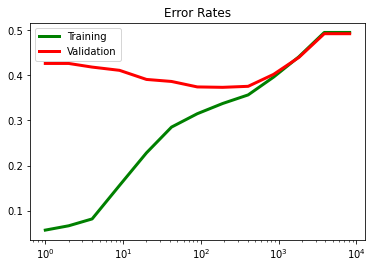

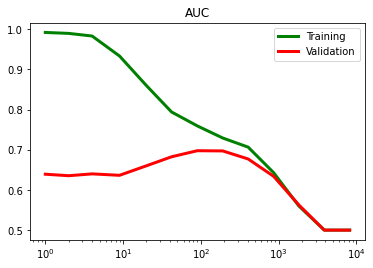

In [7]:
fig, ax = plt.subplots(1,1)


ax.semilogx(min_leaves, min_leaves_training_error_rates, "g-", lw=3, label = "Training")
ax.semilogx(min_leaves, min_leaves_validation_error_rates, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("Error Rates")
plt.show()

fig, ax = plt.subplots(1,1)


ax.semilogx(min_leaves, min_leaves_training_auc, "g-", lw=3, label = "Training")
ax.semilogx(min_leaves, min_leaves_validation_auc, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("AUC")
plt.show()

`minLeaf`= around 90

## Final Learner

In [72]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
X = X[:,:41] #only taking first 41, maybe deal with the other values later(categorical, binary)

[Xtr, Xva, Ytr, Yva] = ml.splitData(X,Y,0.70) #70% training, 30% validation

final_learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=400, minLeaf=100, maxDepth=50)

#fig, ax = plt.subplots(1,1)


#ax.plot(depth_fpr_training, depth_tpr_training, "g-", lw=2, label = "Training")
#ax.plot(depth_fpr_validation, depth_tpr_validation, "r-", lw=2, label = "Validation")

#plt.legend()
#plt.show()

print(f"auc training {final_learner.auc(Xtr,Ytr)}")
print(f"auc validation {final_learner.auc(Xva,Yva)}")

auc training 0.7399126380560078
auc validation 0.7054405721007307
